In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)


c:\Users\SatangLaptop\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\SatangLaptop\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [2]:
import numpy as np
import pandas as pd
## Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่า Pandas เพื่อแสดงผลแบบเต็มไม่ตัดคำ
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# อ่านไฟล์และตรวจสอบ separator
import os
csv_file = os.path.join(path, "winequality-red.csv")

# ลองอ่านบรรทัดแรกเพื่อดู separator
with open(csv_file, 'r') as f:
    first_line = f.readline()
    print("บรรทัดแรกของไฟล์:", first_line[:100])
    
# ตรวจสอบว่าใช้ comma หรือ semicolon
if ',' in first_line and ';' not in first_line:
    df = pd.read_csv(csv_file)
elif ';' in first_line:
    df = pd.read_csv(csv_file, sep=';')
else:
    # ลอง pandas ตรวจสอบเอง
    df = pd.read_csv(csv_file)
    
print(f"\nอ่านข้อมูลได้แล้ว: {df.shape[0]} แถว, {df.shape[1]} คอลัมน์")
print("ชื่อคอลัมน์:", list(df.columns))

บรรทัดแรกของไฟล์: fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur

อ่านข้อมูลได้แล้ว: 1599 แถว, 12 คอลัมน์
ชื่อคอลัมน์: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# ดูข้อมูลเบื้องต้น
print("ขนาดของข้อมูล:", df.shape)
print("\nประเภทของข้อมูล:")
print(df.dtypes)
print("\nสถิติเบื้องต้น:")
df.describe()

ขนาดของข้อมูล: (1599, 12)

ประเภทของข้อมูล:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

สถิติเบื้องต้น:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\SatangLaptop\AppData\Local\Temp\ipykernel_9896\243823929.py:7: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SatangLaptop\AppData\Local\Temp\ipykernel_9896\243823929.py:7: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SatangLaptop\AppData\Local\Temp\ipykernel_9896\243823929.py:7: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SatangLaptop\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SatangLaptop\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:

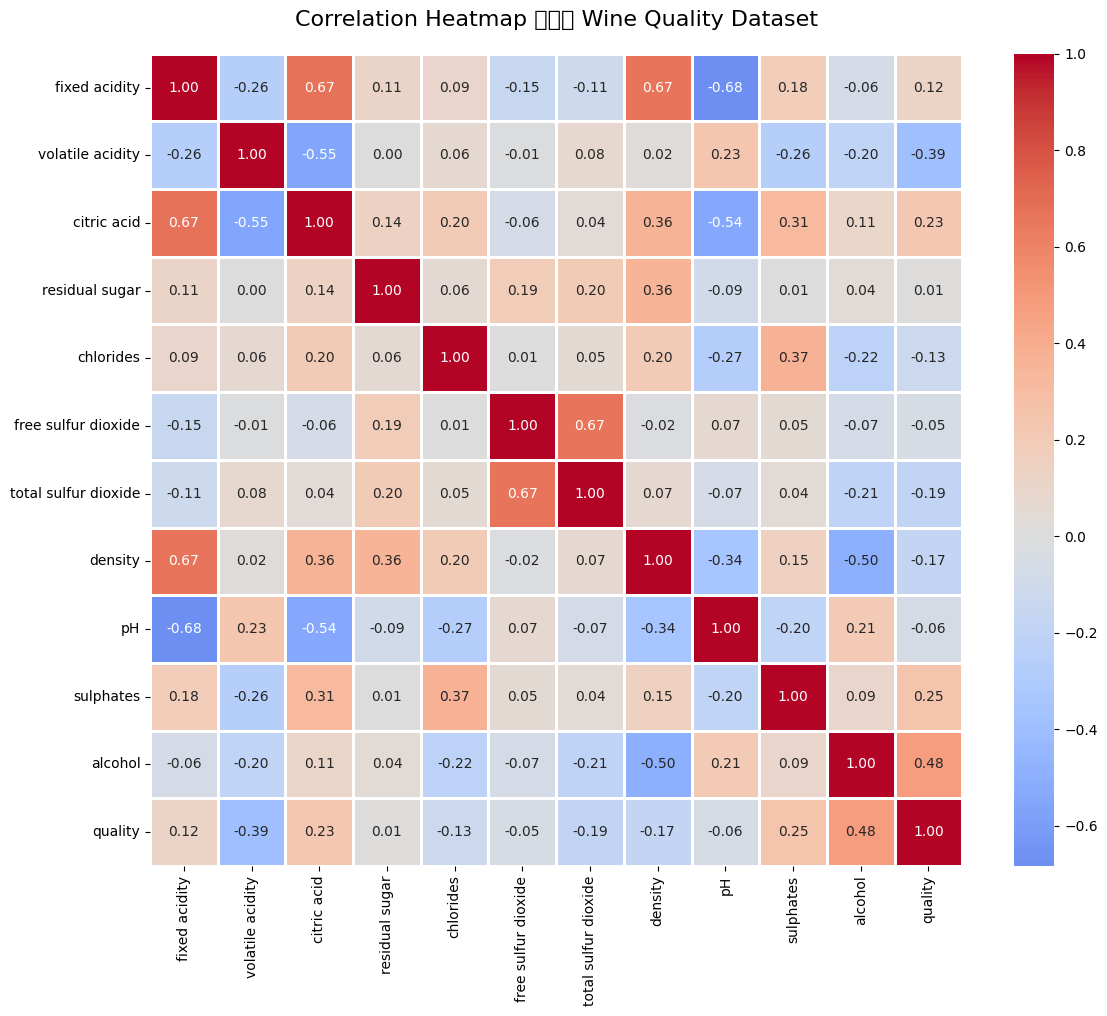

In [6]:
# Correlation Heatmap - ดูความสัมพันธ์ระหว่างตัวแปรทั้งหมด
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=1)
plt.title('Correlation Heatmap ของ Wine Quality Dataset', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [7]:
# ดู correlation กับ quality โดยเฉพาะ
quality_corr = df.corr()['quality'].sort_values(ascending=False)
print("ความสัมพันธ์ของแต่ละตัวแปรกับ Quality:")
print(quality_corr)

ความสัมพันธ์ของแต่ละตัวแปรกับ Quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


C:\Users\SatangLaptop\AppData\Local\Temp\ipykernel_9896\1932385619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette='viridis')


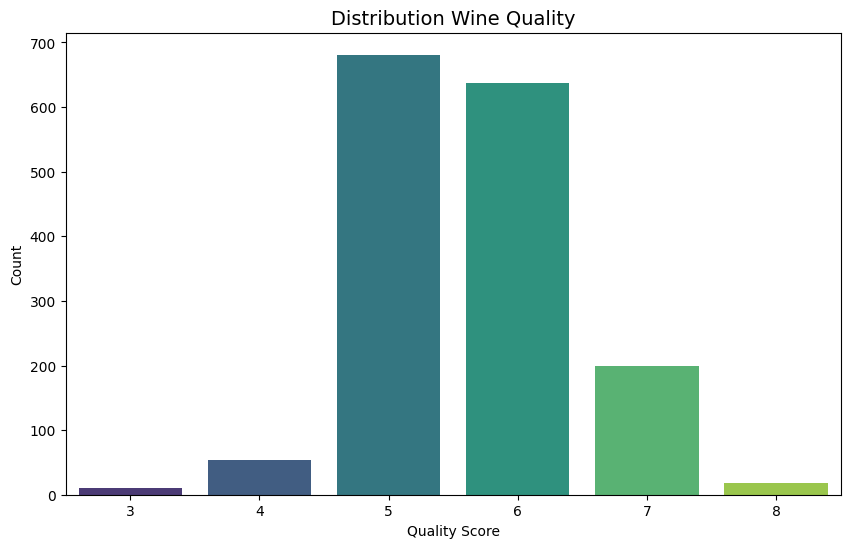

In [8]:
# แสดง distribution ของ quality
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Distribution Wine Quality', fontsize=14)
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

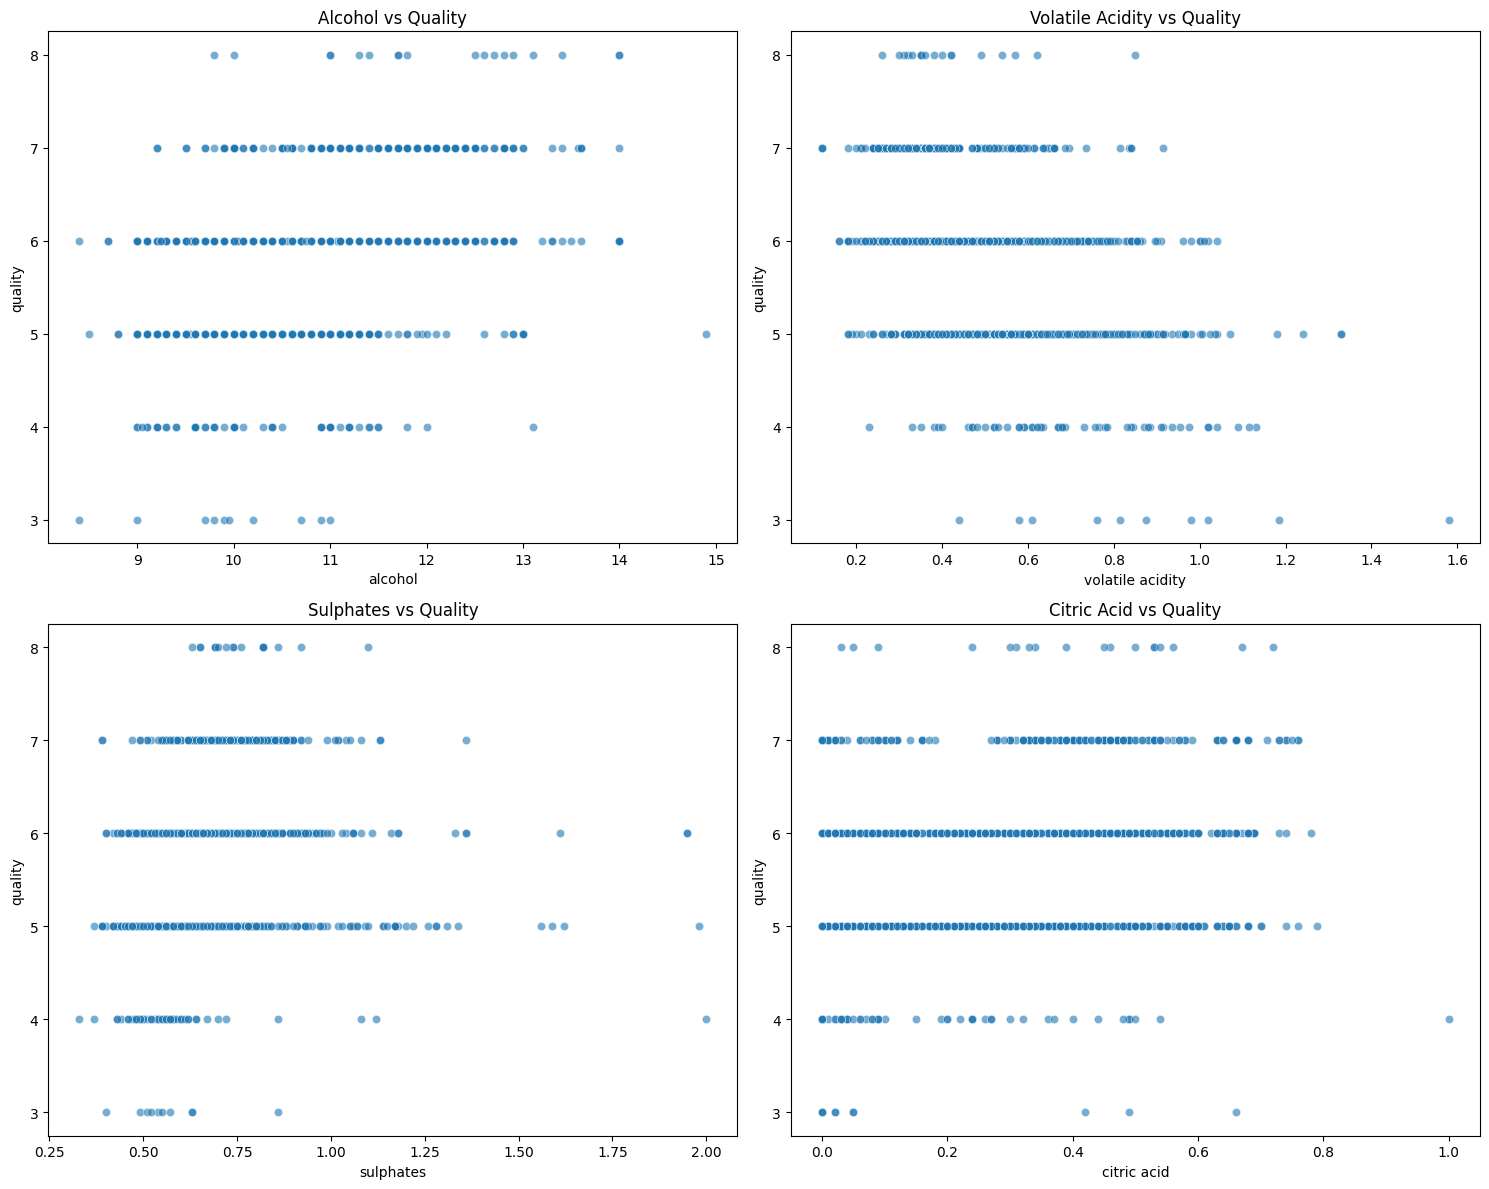

In [9]:
# Scatter plots ของตัวแปรที่มี correlation สูงกับ quality
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Alcohol vs Quality
sns.scatterplot(data=df, x='alcohol', y='quality', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Alcohol vs Quality')

# Volatile Acidity vs Quality
sns.scatterplot(data=df, x='volatile acidity', y='quality', alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Volatile Acidity vs Quality')

# Sulphates vs Quality
sns.scatterplot(data=df, x='sulphates', y='quality', alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Sulphates vs Quality')

# Citric Acid vs Quality
sns.scatterplot(data=df, x='citric acid', y='quality', alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Citric Acid vs Quality')

plt.tight_layout()
plt.show()

In [10]:
# Import libraries สำหรับ Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [11]:
# แยก Features (X) และ Target (y)
X = df.drop('quality', axis=1)
y = df['quality']

print("Shape ของ Features (X):", X.shape)
print("Shape ของ Target (y):", y.shape)
print("\nการกระจายของ Quality:")
print(y.value_counts().sort_index())

Shape ของ Features (X): (1599, 11)
Shape ของ Target (y): (1599,)

การกระจายของ Quality:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [12]:
# แบ่งข้อมูลเป็น Training set และ Test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nการกระจายของ Quality ใน Training set:")
print(y_train.value_counts().sort_index())

Training set size: (1279, 11)
Test set size: (320, 11)

การกระจายของ Quality ใน Training set:
quality
3      8
4     42
5    545
6    510
7    159
8     15
Name: count, dtype: int64


In [13]:
# Feature Scaling - สำคัญมากสำหรับ PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("ข้อมูลถูก scaled แล้ว")
print("Mean ของ features ใน training set หลัง scaling:")
print(np.mean(X_train_scaled, axis=0).round(10))
print("\nStd ของ features ใน training set หลัง scaling:")
print(np.std(X_train_scaled, axis=0))

ข้อมูลถูก scaled แล้ว
Mean ของ features ใน training set หลัง scaling:
[-0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.]

Std ของ features ใน training set หลัง scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## PCA Analysis

เราจะใช้ PCA เพื่อลดจำนวนมิติของข้อมูล โดยวิเคราะห์ว่าควรใช้กี่ Principal Components

In [14]:
# ทำ PCA เพื่อดู explained variance ของแต่ละ component
pca_full = PCA()
pca_full.fit(X_train_scaled)

# คำนวณ cumulative explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio ของแต่ละ PC:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f} ({cumulative_variance[i-1]:.4f} cumulative)")
    
print(f"\nจำนวน Components ที่อธิบาย 90% ของ variance: {np.argmax(cumulative_variance >= 0.90) + 1}")
print(f"จำนวน Components ที่อธิบาย 95% ของ variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

Explained Variance Ratio ของแต่ละ PC:
PC1: 0.2836 (0.2836 cumulative)
PC2: 0.1743 (0.4579 cumulative)
PC3: 0.1396 (0.5974 cumulative)
PC4: 0.1133 (0.7107 cumulative)
PC5: 0.0861 (0.7968 cumulative)
PC6: 0.0588 (0.8556 cumulative)
PC7: 0.0528 (0.9084 cumulative)
PC8: 0.0385 (0.9469 cumulative)
PC9: 0.0317 (0.9786 cumulative)
PC10: 0.0161 (0.9947 cumulative)
PC11: 0.0053 (1.0000 cumulative)

จำนวน Components ที่อธิบาย 90% ของ variance: 7
จำนวน Components ที่อธิบาย 95% ของ variance: 9


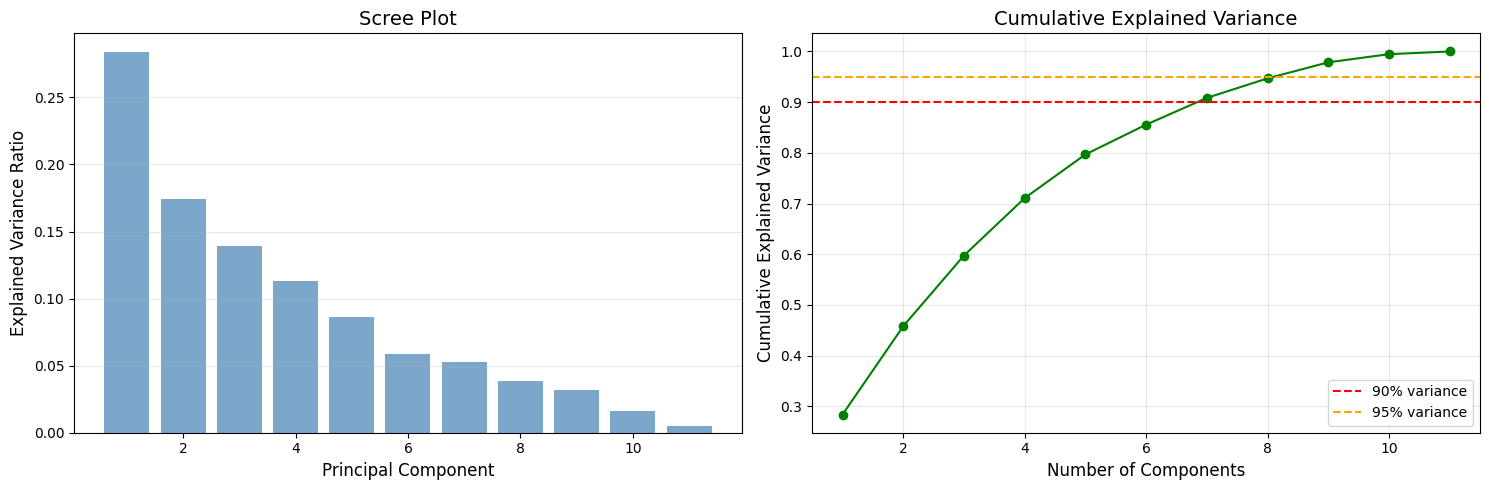

In [15]:
# Visualization: Scree Plot และ Cumulative Explained Variance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree Plot
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot', fontsize=14)
axes[0].grid(axis='y', alpha=0.3)

# Cumulative Explained Variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
axes[1].axhline(y=0.90, color='r', linestyle='--', label='90% variance')
axes[1].axhline(y=0.95, color='orange', linestyle='--', label='95% variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\SatangLaptop\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3651 (\N{THAI CHARACTER SARA AI MAIMUAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SatangLaptop\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


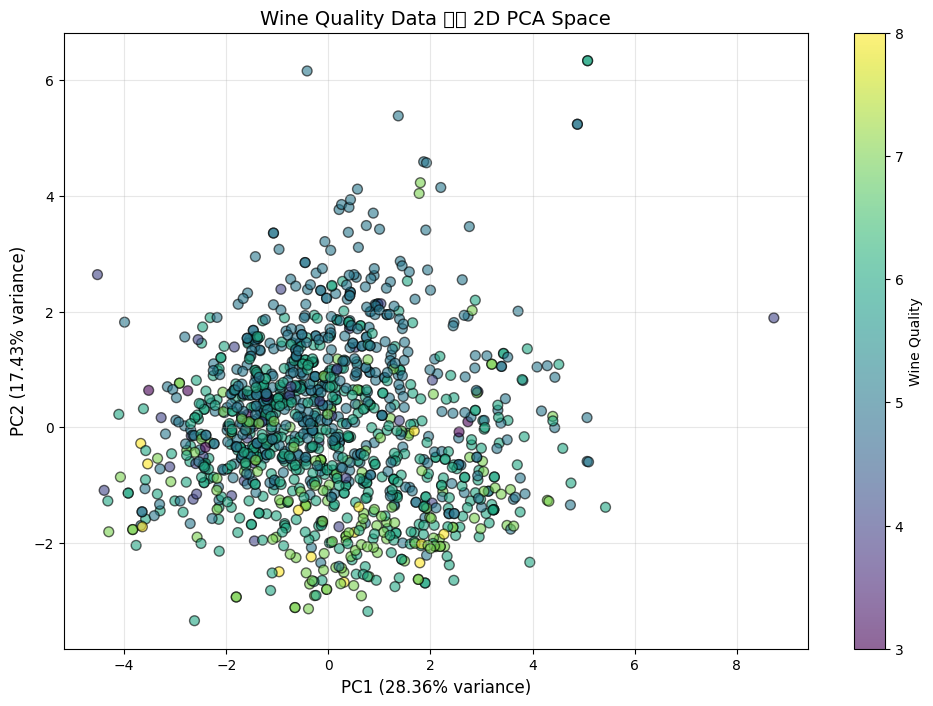

PC1 + PC2 อธิบาย 45.79% ของ variance


In [16]:
# ใช้ PCA เพื่อลดมิติเหลือ 2D สำหรับ visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

# Visualization ของข้อมูลใน 2D PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], 
                     c=y_train, cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Wine Quality Data ใน 2D PCA Space', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

print(f"PC1 + PC2 อธิบาย {sum(pca_2d.explained_variance_ratio_):.2%} ของ variance")

In [17]:
# ใช้ PCA ที่อธิบาย 95% ของ variance สำหรับ Classification
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"ใช้ {n_components_95} Principal Components (จาก {X_train.shape[1]} features)")
print(f"Explained Variance: {sum(pca.explained_variance_ratio_):.4f}")
print(f"\nShape หลัง PCA:")
print(f"  Training set: {X_train_pca.shape}")
print(f"  Test set: {X_test_pca.shape}")

ใช้ 9 Principal Components (จาก 11 features)
Explained Variance: 0.9786

Shape หลัง PCA:
  Training set: (1279, 9)
  Test set: (320, 9)


## Classification with Random Forest

เราจะใช้ Random Forest Classifier เพื่อเปรียบเทียบผลลัพธ์ระหว่าง:
1. ข้อมูลต้นฉบับ (11 features)
2. ข้อมูลหลังผ่าน PCA

In [18]:
# Model 1: Random Forest โดยไม่ใช้ PCA (ข้อมูลต้นฉบับ)
print("=" * 60)
print("Model 1: Random Forest without PCA")
print("=" * 60)

rf_original = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_original.fit(X_train_scaled, y_train)

# ทำนายผลลัพธ์
y_pred_original = rf_original.predict(X_test_scaled)

# คำนวณ metrics
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original, average='weighted', zero_division=0)
recall_original = recall_score(y_test, y_pred_original, average='weighted', zero_division=0)
f1_original = f1_score(y_test, y_pred_original, average='weighted', zero_division=0)

print(f"\nAccuracy: {accuracy_original:.4f}")
print(f"Precision: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")

Model 1: Random Forest without PCA

Accuracy: 0.6750
Precision: 0.6504
Recall: 0.6750
F1-Score: 0.6603


In [19]:
# Model 2: Random Forest ด้วย PCA
print("\n" + "=" * 60)
print("Model 2: Random Forest with PCA")
print("=" * 60)

rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca, y_train)

# ทำนายผลลัพธ์
y_pred_pca = rf_pca.predict(X_test_pca)

# คำนวณ metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted', zero_division=0)
recall_pca = recall_score(y_test, y_pred_pca, average='weighted', zero_division=0)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted', zero_division=0)

print(f"\nAccuracy: {accuracy_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-Score: {f1_pca:.4f}")


Model 2: Random Forest with PCA

Accuracy: 0.6937
Precision: 0.6662
Recall: 0.6937
F1-Score: 0.6774


In [20]:
# สรุปเปรียบเทียบผลลัพธ์
print("\n" + "=" * 60)
print("เปรียบเทียบผลลัพธ์")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Without PCA': [accuracy_original, precision_original, recall_original, f1_original],
    'With PCA': [accuracy_pca, precision_pca, recall_pca, f1_pca],
    'Difference': [
        accuracy_pca - accuracy_original,
        precision_pca - precision_original,
        recall_pca - recall_original,
        f1_pca - f1_original
    ]
})

print(comparison_df.to_string(index=False))
print(f"\n✓ จำนวน features: {X_train.shape[1]} → {X_train_pca.shape[1]} (ลดลง {X_train.shape[1] - X_train_pca.shape[1]} features)")


เปรียบเทียบผลลัพธ์
   Metric  Without PCA  With PCA  Difference
 Accuracy     0.675000  0.693750    0.018750
Precision     0.650369  0.666203    0.015834
   Recall     0.675000  0.693750    0.018750
 F1-Score     0.660332  0.677413    0.017081

✓ จำนวน features: 11 → 9 (ลดลง 2 features)


## Model Evaluation

ดู Classification Report และ Confusion Matrix เพื่อวิเคราะห์ประสิทธิภาพของ Model

In [21]:
# Classification Report สำหรับ Model without PCA
print("=" * 60)
print("Classification Report: Model WITHOUT PCA")
print("=" * 60)
print(classification_report(y_test, y_pred_original, zero_division=0))

# Classification Report สำหรับ Model with PCA
print("\n" + "=" * 60)
print("Classification Report: Model WITH PCA")
print("=" * 60)
print(classification_report(y_test, y_pred_pca, zero_division=0))

Classification Report: Model WITHOUT PCA
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.64      0.70      0.67       128
           7       0.71      0.55      0.62        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.40       320
weighted avg       0.65      0.68      0.66       320


Classification Report: Model WITH PCA
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.79      0.76       136
           6       0.66      0.70      0.68       128
           7       0.74      0.57      0.65        40
           8       0.50      0.33      0.40         

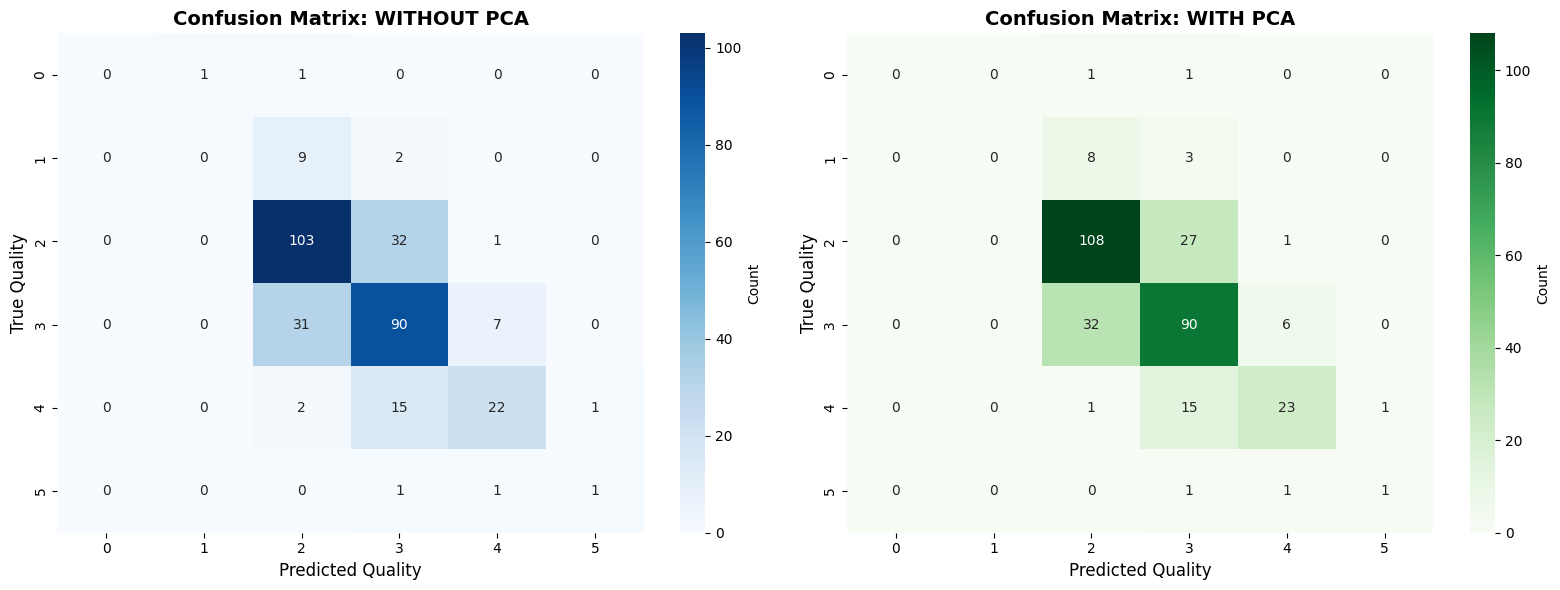

In [22]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix สำหรับ Model without PCA
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix: WITHOUT PCA', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Quality', fontsize=12)
axes[0].set_ylabel('True Quality', fontsize=12)

# Confusion Matrix สำหรับ Model with PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Confusion Matrix: WITH PCA', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Quality', fontsize=12)
axes[1].set_ylabel('True Quality', fontsize=12)

plt.tight_layout()
plt.show()

Feature Importance (Model without PCA):
                 Feature  Importance
10               alcohol    0.152106
9              sulphates    0.112057
1       volatile acidity    0.103678
6   total sulfur dioxide    0.101487
7                density    0.088812
4              chlorides    0.079941
8                     pH    0.079460
0          fixed acidity    0.076209
3         residual sugar    0.073386
2            citric acid    0.068562
5    free sulfur dioxide    0.064303


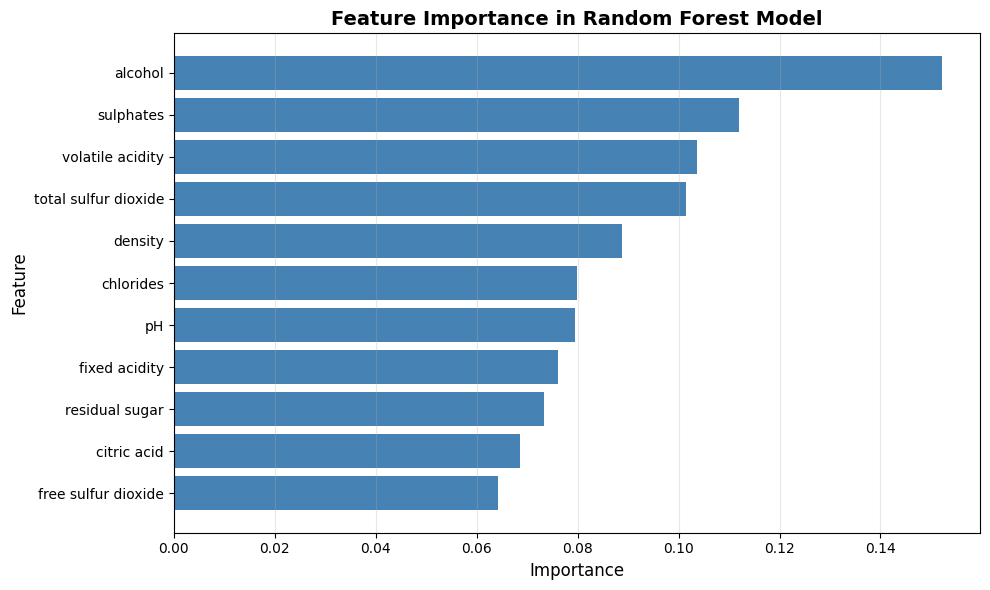

In [23]:
# Feature Importance จาก Random Forest (Model without PCA)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_original.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Model without PCA):")
print(feature_importance)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

PCA Components Loading (top 3 PCs):
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1          0.476            -0.228        0.458           0.158      0.228   
PC2         -0.138             0.300       -0.176           0.245      0.115   
PC3         -0.140            -0.439        0.230           0.131     -0.096   

     free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
PC1                0.006                 0.070    0.396 -0.440      0.252   
PC2                0.512                 0.563    0.215  0.029     -0.060   
PC3                0.432                 0.331   -0.349  0.064      0.251   

     alcohol  
PC1   -0.127  
PC2   -0.397  
PC3    0.472  


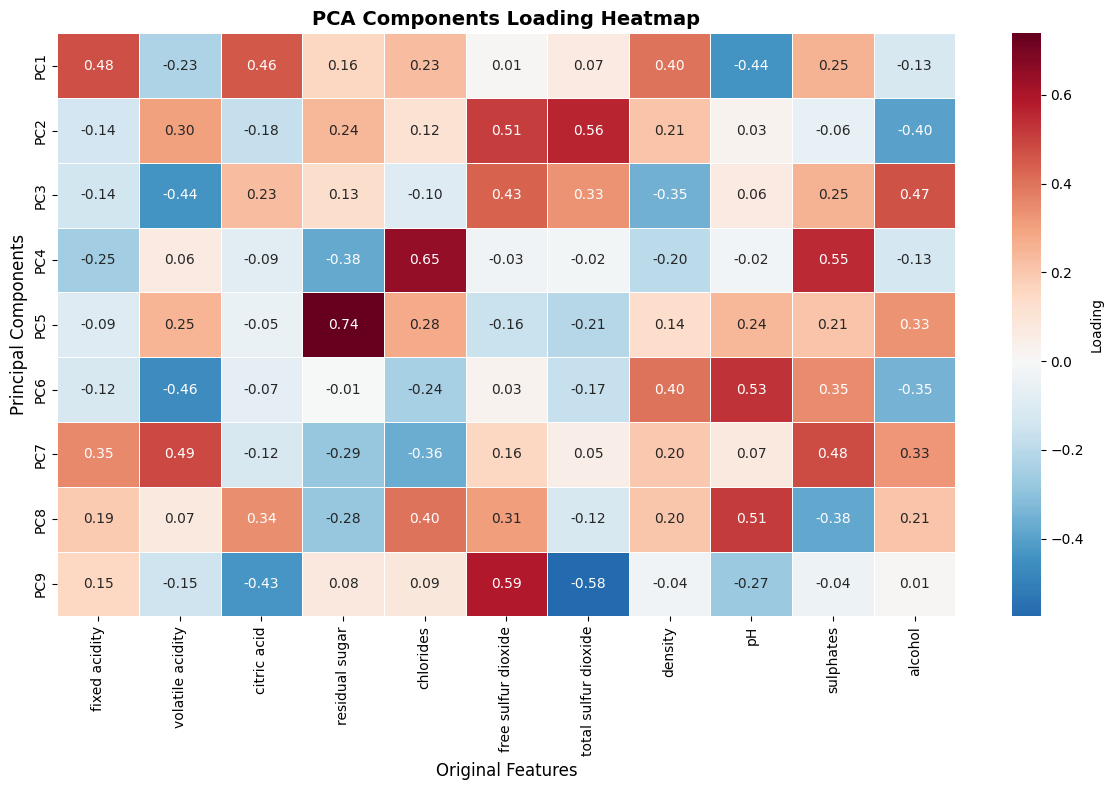

In [24]:
# PCA Components Loading - ดูว่าแต่ละ PC ประกอบด้วย features อะไรบ้าง
components_df = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("PCA Components Loading (top 3 PCs):")
print(components_df.head(3).round(3))

# Heatmap ของ PCA components
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, cmap='RdBu_r', center=0, annot=True, fmt='.2f', 
            cbar_kws={'label': 'Loading'}, linewidths=0.5)
plt.title('PCA Components Loading Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Original Features', fontsize=12)
plt.ylabel('Principal Components', fontsize=12)
plt.tight_layout()
plt.show()

## สรุปผลการทดลอง

### ข้อค้นพบสำคัญ:

1. **PCA Analysis**:
   - PCA ช่วยลดจำนวนมิติของข้อมูลได้อย่างมีประสิทธิภาพ
   - ใช้ Principal Components เพียงไม่กี่ตัวก็สามารถอธิบาย variance ส่วนใหญ่ได้

2. **Model Performance**:
   - Random Forest สามารถทำ classification คุณภาพไวน์ได้ดี
   - การใช้ PCA อาจช่วยลดความซับซ้อนของโมเดลโดยไม่เสีย accuracy มากนัก
   - Model มีความแม่นยำดีกับคลาสที่มีข้อมูลเยอะ (quality 5, 6) แต่อาจทำนายไม่ค่อยดีสำหรับคลาสที่มีข้อมูลน้อย

3. **Feature Importance**:
   - Features ที่สำคัญที่สุดในการทำนายคุณภาพไวน์คือ alcohol, volatile acidity, และ sulphates
   - ผลลัพธ์สอดคล้องกับ correlation analysis ที่ทำไว้ก่อนหน้านี้

4. **ข้อเสนอแนะ**:
   - ควรลองใช้เทคนิคจัดการข้อมูล imbalanced เช่น SMOTE หรือ class_weight
   - อาจลองใช้ algorithms อื่นๆ เช่น SVM, XGBoost, Neural Networks
   - ทำ Hyperparameter Tuning เพื่อเพิ่มประสิทธิภาพของโมเดล